In [17]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Importación de pandas, archivo .csv
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Cantidad de filas y columnas
df.shape

(8523, 12)

In [4]:
# Tipos de datos en cada variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# Buscar filas duplicadas
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [6]:
# Contar valores duplicados
# No existen valores duplicados
df.duplicated().sum()

0

In [7]:
# Identificar valores faltantes(nulos) por columna
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Se completa los valores faltantes de la columna 'Item Weight', que es de tipo "float", utilizando la media de la columna
# Utilizar la media, tendrá más coherencia que reemplazar por "0", especialmente si hay que realizar cálculos que puedan incluir medidas de tendencia central, entre otros.
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# La columna 'Outlet_Size' tiene tres posibles categorías: medium, small, high
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
# Por el momento los datos de la columna 'Outlet_Size' se llenarán con una nueva categoría
# Utilizar la moda no es conveniente por la cantidad de datos faltantes, prácticamente se duplicaría los datos de una de las categorías
df['Outlet_Size'].fillna('Missing', inplace=True)

In [11]:
# Confirmar que ya no existen valores faltantes
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
# Buscar si hay alguna inconsistencia en las categorías de datos
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
# En la columna 'Item_Fat_Content' se repiten las mismas categorías, hay que unificarlas
# Regular y reg, son lo mismo, al igual que LF y low fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
# Obtener las estadísticas de las columnas numéricas
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [15]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350


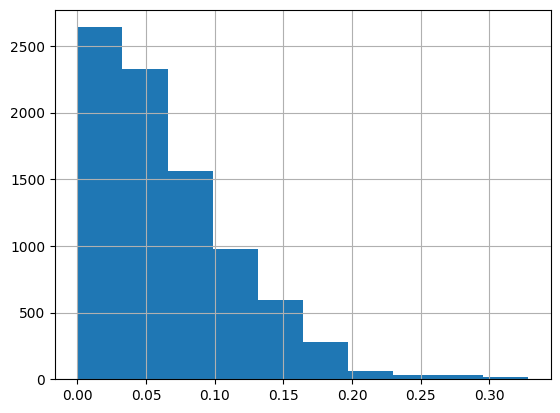

In [21]:
# Hacer un histograma y remover notación científica
df['Item_Visibility'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

Podemos ver que la visibilidad de los items se encuentra en un rango de 0.00 a 0.33, por lo que en primera instancia se podría decir que hay una mayor frecuencia en productos con poca visibilidad.

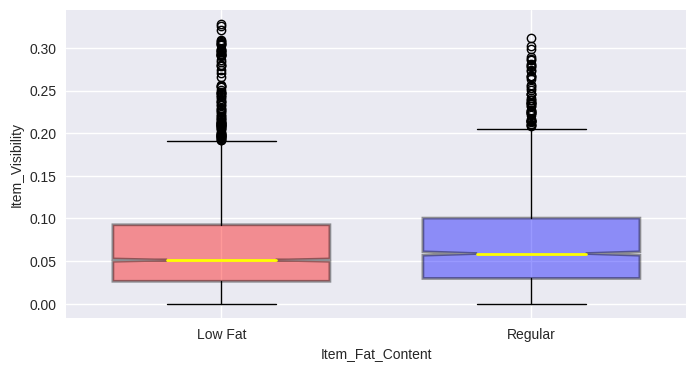

In [33]:
# Para analizar mejor la visibilidad, se genera un gráfico agregando una variable categórica
# Se genera estilo seaborn
# Se generan dos df, uno para cada filtro creado
# Se genera el boxplot
low_fat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Visibility']
regular = df.loc[df['Item_Fat_Content']=='Regular','Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
boxplots = axes.boxplot([low_fat,regular],
           notch = True,
           labels=['Low Fat', 'Regular'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Se personaliza el gráfico
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item_Fat_Content', fontsize = 10);
plt.ylabel('Item_Visibility', fontsize = 10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

Se puede observar que no hay mucha diferencia en la distribución de los datos(visibilidad de los items) cuando el contenido de grasa es bajo o regular. Sin embargo existen algunos valores atípicos que se encuentran por encima del "máximo".

<Axes: >

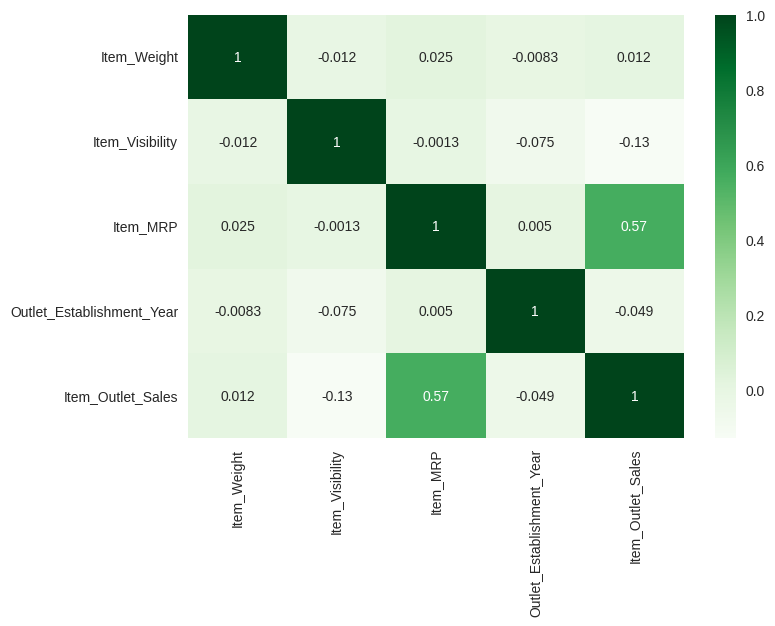

In [35]:
# Se agrega un mapa de calor, para hallar las correlaciones entre variables
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)

Existe una correlación moderada entre las variables item_MRP e Item_Outlet_Sales. No se ha identificado ninguna relación entre las demás variables del conjunto de datos.